# MIS780 Advanced AI For Business - Assignment 2 - T2 2022

## Example 3:  Recurrent Neural Network - Predicting Stock Prices for Tesla Inc.

**Student Name:** Pranitha Gaddam

**Student ID:** 221183244

## Table of Content
   
1. [Data Description](#cell_Preparation)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Model Construction](#cell_model)

4. [Model Execution](#cell_execution)
 
5. [Experiments Report](#cell_report)



## Executive Summary

In this notebook,we will deal with predicting the stock price for the company
Tesla Inc. Since, the future is unpredictable, no matter how good our analysis is, 
it is only as good as the information that is available right now. We cannot know for certain what will happen tomorrow, and we cannot predict all the contingencies. Moreover, stock prices are highly dynamic and have non-linear relationships and are dependent on many factors at the same time. However, AI in the stock market can help perform technical, fundamental analysis and recognize patterns better than humans. Which is why ,the purpose of this notebook is to analyse the capability of a neural network to solve this problem efficiently. Recurrent neural network has showcased a reasonable predictive capability of addressing these complex time series issues.The selected dataset has been acquired from Yahoo Finance from 2010-08-02 until 2022-09-02.In this instance, I have used the Date, Closing price, Adjusted Closing Price,High,Low prices and Volume of the stock that determine the Open price. I have implemented a multivariate model based on RNN architecture which applies a feedforward neural network to process sequences of inputs.The method applied is LSTM (Long short-term memory) as it is appropriate to classify, process and predict time series given time lags of unknown duration. It trains the model by using back-propagation in order to find the temporal dependencies and help in forecasting stock values for Tesla Inc. It is proven that deep learning algorithms have the ability to identify existing patterns and exploiting them by using a soft learning process.Additionally, multivariate prediction models are more efficient and faster to train and deploy in a business environment.For instance,Goldman Sachs, a renowned bank in USA, led a $72.5 million funding round to integrate AI models in its equities trading business so as to benefit from the stock market. 
I have proposed a 3-level methodology for conducting analysis. First, it involves data pre-processing in order to make the data multidimensional and suitable for RNN architecture. Next, we split the data into train and test sets to perform modelling on the training data. Finally, we make predictions using the models trained in the previous step on test data to analysze various error matrices. 

<a id = "cell_Preparation"></a>
## 1. Data Description

The selected dataset has been retrieved from Yahoo Finance for RNN prediction dated from 2010-08-02 to 2022-09-02 (12 year historical prices). It has five variables which are High, Low, Close, Adjusted Close and Volume of the shares traded to predict the Open price. 
Open : The price of the stock when the market opens in the morning
Close : The price of the stock when the market closes in the evening
High : Highest price of the stock in the day 
Low : Lowest price of the stock traded during the day 
Adjusted Close : Stock's closing price amended after certain corporate actions
Volume : Total unit of stocks traded during a particular day


1.   Open : The price of the stock when the market opens in the morning
2.   Close : The price of the stock when the market closes in the evening
3.   High : Highest price of the stock in the day 
4.   Low : Lowest price of the stock traded during the day
5.   Adjusted Close : Stock's closing price amended after certain corporate actions
6.   Volume : Total unit of stocks traded during a particular day


Open, High, Low, Close and Adjusted Close columns have float values, whereas Volume is an integer and Date is an object. The shape of the data is 3425 rows and 7 columns. This data would be used for further preprocessing by using various seaborn packages and matplotlib packages in order to visualise the relationships between the variables. Furthermore, there are no missing values in the dataset. 

In [ ]:
#mount drive to import the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the necessary packages
import numpy as np 
from keras.models import Sequential 
from keras.layers import LSTM 
from keras.layers import Dense, Dropout 
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
from datetime import datetime

In [ ]:
Tesla = pd.read_csv('/content/drive/MyDrive/MIS780/TSLA-2.csv')

In [ ]:
Tesla.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-02,1.366667,1.398000,1.355333,1.394667,1.394667,10771500
1,2010-08-03,1.400000,1.463333,1.388000,1.463333,1.463333,18457500
2,2010-08-04,1.463333,1.478667,1.390000,1.417333,1.417333,13695000
3,2010-08-05,1.436000,1.436667,1.336667,1.363333,1.363333,11943000
4,2010-08-06,1.340000,1.344000,1.301333,1.306000,1.306000,11128500
5,2010-08-09,1.326667,1.332000,1.296667,1.306667,1.306667,12190500
6,2010-08-10,1.310000,1.310000,1.254667,1.268667,1.268667,19219500
7,2010-08-11,1.246000,1.258667,1.190000,1.193333,1.193333,11964000
8,2010-08-12,1.186667,1.193333,1.159333,1.173333,1.173333,10365000
9,2010-08-13,1.212000,1.230000,1.177333,1.221333,1.221333,9510000


In [ ]:
Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045 entries, 0 to 3044
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3045 non-null   object 
 1   Open       3045 non-null   float64
 2   High       3045 non-null   float64
 3   Low        3045 non-null   float64
 4   Close      3045 non-null   float64
 5   Adj Close  3045 non-null   float64
 6   Volume     3045 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [ ]:
Tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3.045000e+03
mean,55.121257,56.355361,53.773551,55.096358,55.096358,9.378067e+07
std,93.322476,95.474544,90.896401,93.212331,93.212331,8.256072e+07
min,1.186667,1.193333,1.159333,1.173333,1.173333,1.777500e+06
25%,8.838000,8.998000,8.465333,8.660000,8.660000,4.177020e+07
50%,16.022667,16.265333,15.712667,16.041332,16.041332,7.578150e+07
75%,23.570000,23.899332,23.213333,23.518000,23.518000,1.176747e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [ ]:
Tesla.shape

(3045, 7)

In [ ]:
Tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing



Data preprocessing involves creating visualisations between the variables to detect patterns occuring over a period of time. Moreover, it is crucial to also standardise the data to make it fit for training inside the RNN architecture. 

In [ ]:
data = Tesla.loc[:,["High", "Low", "Close", "Adj Close"]].copy()

We use seaborn package to visualise the features that are going to predict the Open price. The package used is matplotlib.pyplot and the style use is seaborn.

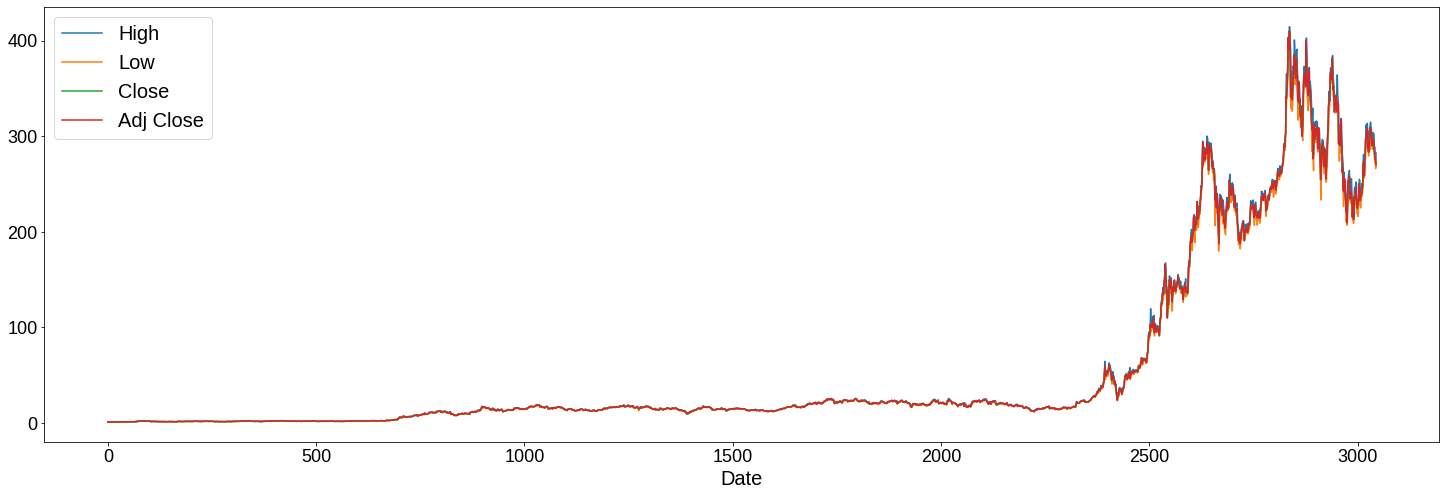

In [ ]:
data.plot(figsize=(25,8), fontsize = 18)
plt.xlabel("Date", fontsize = 20)
plt.legend(fontsize = 20)
plt.style.use("seaborn")
plt.show()

Trend Analysis : It is evident that the years leading upto the recent years, there has been a growth in the market valuation of the Tesla shares, the price ranging between  $1.3 and  1.39. It is more likely because the advent of AI in automotive industries that has influenced the company to proliferate and compound its revenue over time.Additionally, it could be due to management's decisions (Elon Musk and his executive team's decisions) that impacts the overall company standing. Moreover, we can see a lot of fluctuations in the trend due to the Covid period where market sales crashed in 2020 and 2021. The stock is seen to have significantly dropped, however, due to a quick overturn of events and a positive outlook as mentioned in the Tesla company financial reports, the stock price rose up again. The plot fails to convert the x-axis of Date to Datetime period, although, in further calculation the date will be split for plotting purposes.

In [ ]:
Vol = Tesla.loc[:,"Volume"].copy()

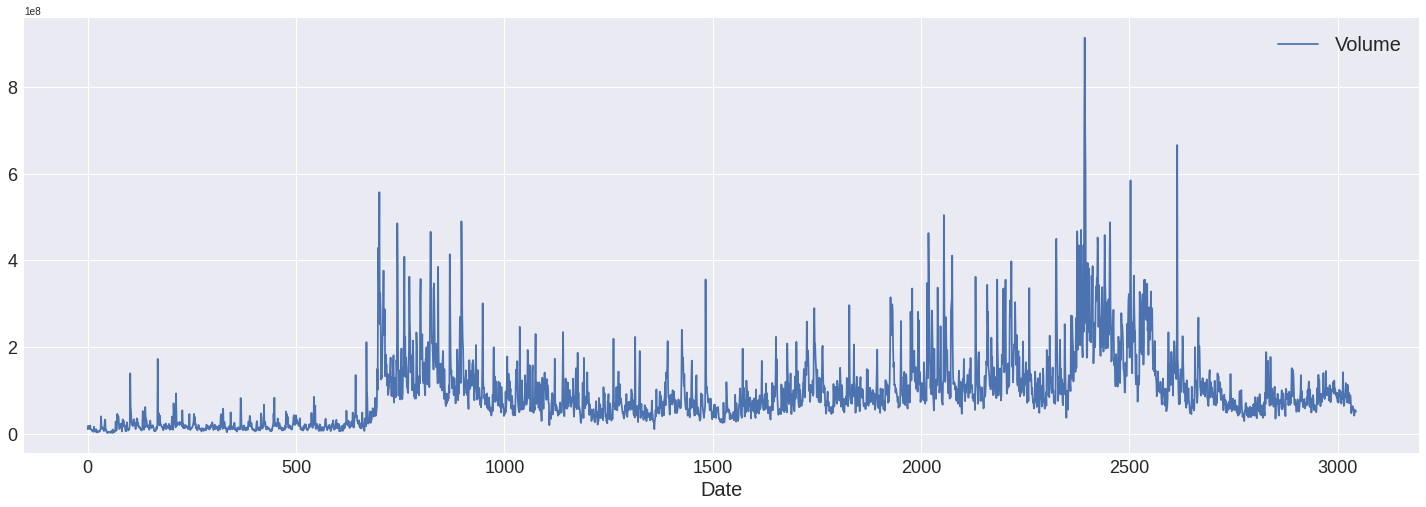

In [ ]:
Vol.plot(figsize=(25,8), fontsize = 18)
plt.xlabel("Date", fontsize = 20)
plt.legend(fontsize = 20)
plt.style.use("seaborn")
plt.show()

In [ ]:
Tesla.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-02,1.366667,1.398000,1.355333,1.394667,1.394667,10771500
1,2010-08-03,1.400000,1.463333,1.388000,1.463333,1.463333,18457500
2,2010-08-04,1.463333,1.478667,1.390000,1.417333,1.417333,13695000
3,2010-08-05,1.436000,1.436667,1.336667,1.363333,1.363333,11943000
4,2010-08-06,1.340000,1.344000,1.301333,1.306000,1.306000,11128500
5,2010-08-09,1.326667,1.332000,1.296667,1.306667,1.306667,12190500
6,2010-08-10,1.310000,1.310000,1.254667,1.268667,1.268667,19219500
7,2010-08-11,1.246000,1.258667,1.190000,1.193333,1.193333,11964000
8,2010-08-12,1.186667,1.193333,1.159333,1.173333,1.173333,10365000
9,2010-08-13,1.212000,1.230000,1.177333,1.221333,1.221333,9510000


This variation in the plot depicts the volume of shares traded from the start and the end date. There was a stark increase in the 2017, followed by frequent fluctuations in the volume traded. 

In [ ]:
#seperate dates for future plotting using pd.to_datetime, extracting the training dates into seperate series. 
Train_dates = pd.to_datetime(Tesla['Date'])

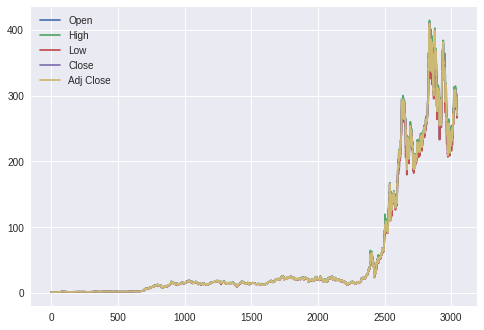

In [ ]:
#Extract the columns we would like to use as variables for training model purposes. 
cols = list(Tesla)[1:6] #exclude the volume

df_for_training = Tesla[cols].astype(float) #convert values to float to not lose values in normalisation.  

df_for_plot = df_for_training.tail(5000)
df_for_plot.plot.line()

In [ ]:
df_for_training

,Open,High,Low,Close,Adj Close
0,1.366667,1.398000,1.355333,1.394667,1.394667
1,1.400000,1.463333,1.388000,1.463333,1.463333
2,1.463333,1.478667,1.390000,1.417333,1.417333
3,1.436000,1.436667,1.336667,1.363333,1.363333
4,1.340000,1.344000,1.301333,1.306000,1.306000
...,...,...,...,...,...
3040,282.829987,287.739990,280.700012,284.820007,284.820007
3041,287.869995,288.480011,272.649994,277.700012,277.700012
3042,280.619995,281.250000,271.809998,275.609985,275.609985
3043,272.579987,277.579987,266.149994,277.160004,277.160004


The values in the dataframe change drastically, hence its important to perform standardisation. Moreover, LSTM uses sigmoid and tanh functions that are sensitive to magnitude so the values need to be normalized. 

In [ ]:
#Standardisation
scaler = StandardScaler() 
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


As needed, the LSTM neural network required to reshape an input data into n_samples x timesteps. In this instance, the n_features is 2 and timesteps = 3. 
The resultant n_samples = 5 , as the input data has 9 rows. 

In [ ]:
trainX = []
trainY = []

n_future = 1  #number of days we want to predict in future
n_past = 14   #number of days we want to use to predict the future

for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
  trainX.append(df_for_training_scaled[i- n_past:i, 0:df_for_training.shape[1]])
  trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
  

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
trainY

array([[-0.57742546],
       [-0.57711108],
       [-0.57699677],
       ...,
       [ 2.41673587],
       [ 2.33056875],
       [ 2.42155878]])

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (3031, 14, 5).
trainY shape == (3031, 1).


<a id = "cell_model"></a>
## 3. Model Construction

For model construction, I have used 64 units for LSTM in the first layer, with relu being the activation function. ReLu is the rectified linear activation function which will output the input directly if it is positive, otherwise zero. The input shape for trainX is (14,5). Since it is a stacked LSTM, we have return_sequences = True in the first instance. 

In [ ]:
#Define the autoencoder models 
from keras.layers import LSTM
model = Sequential()
model.add(LSTM (64, activation = 'relu', input_shape = (trainX.shape[1], trainX.shape[2]), return_sequences = True))
model.add(LSTM(32, activation = 'relu', return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


The above output gives 30,369 parameters.  

<a id = "cell_execution"></a>
## 4. Model Execution

In [ ]:
history = model.fit(trainX, trainY , epochs =10, batch_size = 16, validation_split = 0.1,
                    verbose = 1)

Epoch 1/10
171/171 [==============================] - 5s 16ms/step - loss: 0.0817 - val_loss: 1.0996
Epoch 2/10
171/171 [==============================] - 2s 14ms/step - loss: 0.0199 - val_loss: 0.1364
Epoch 3/10
171/171 [==============================] - 2s 14ms/step - loss: 0.0148 - val_loss: 0.1114
Epoch 4/10
171/171 [==============================] - 3s 18ms/step - loss: 0.0132 - val_loss: 0.2777
Epoch 5/10
171/171 [==============================] - 4s 22ms/step - loss: 0.0148 - val_loss: 0.0469
Epoch 6/10
171/171 [==============================] - 2s 14ms/step - loss: 0.0117 - val_loss: 0.0656
Epoch 7/10
171/171 [==============================] - 2s 14ms/step - loss: 0.0103 - val_loss: 0.0486
Epoch 8/10
171/171 [==============================] - 2s 14ms/step - loss: 0.0108 - val_loss: 0.0312
Epoch 9/10
171/171 [==============================] - 2s 14ms/step - loss: 0.0110 - val_loss: 0.0445
Epoch 10/10
171/171 [==============================] - 2s 14ms/step - loss: 0.0110 - val_lo

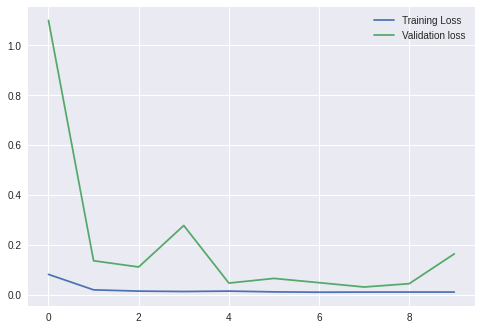

In [ ]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend()

<a id = "cell_report"></a>
## 5. Experiments Report

In [ ]:
#Forecasting 

n_future = 60 #predicting 60 days into future
forecast = pd.date_range(list(Train_dates) [-1], periods = n_future, freq='1d').tolist()

future = model.predict(trainX[-n_future:])

In [ ]:
future

array([[1.7909206],
       [1.796478 ],
       [1.7787008],
       [1.7280643],
       [1.6852658],
       [1.6739299],
       [1.6442702],
       [1.6171278],
       [1.6391528],
       [1.6762971],
       [1.7026412],
       [1.7391827],
       [1.7720158],
       [1.781821 ],
       [1.7570847],
       [1.7213385],
       [1.6991439],
       [1.684648 ],
       [1.6875458],
       [1.7120035],
       [1.7541493],
       [1.7777138],
       [1.7734504],
       [1.7632469],
       [1.7608013],
       [1.7645464],
       [1.7764113],
       [1.7889678],
       [1.8084421],
       [1.8585187],
       [1.9218836],
       [1.9656518],
       [1.9787443],
       [1.9974508],
       [2.0240896],
       [2.0701118],
       [2.1344862],
       [2.185794 ],
       [2.240181 ],
       [2.2842026],
       [2.2766905],
       [2.2640595],
       [2.2318342],
       [2.2191691],
       [2.208087 ],
       [2.2114763],
       [2.2503557],
       [2.2875865],
       [2.3036675],
       [2.3139696],


In [ ]:
#Inverse transformation to rescale back to original stock price
future_copies = np.repeat(future, df_for_training.shape[1], axis = -1)
y_pred = scaler.inverse_transform(future_copies)[:,0]

In [ ]:
#Predicted values are : 
y_pred

array([222.22696, 222.74551, 221.08676, 216.36201, 212.3686 , 211.3109 ,
       208.54343, 206.01085, 208.06593, 211.53177, 213.98987, 217.39944,
       220.46301, 221.3779 , 219.06982, 215.73445, 213.66354, 212.31097,
       212.58134, 214.86343, 218.79593, 220.99467, 220.59686, 219.6448 ,
       219.41661, 219.76605, 220.87314, 222.04475, 223.86185, 228.53435,
       234.44675, 238.53062, 239.75226, 241.49771, 243.98329, 248.2775 ,
       254.28409, 259.07147, 264.14615, 268.2537 , 267.55276, 266.3742 ,
       263.36734, 262.1856 , 261.15155, 261.4678 , 265.09552, 268.56943,
       270.06992, 271.03116, 269.7655 , 266.6518 , 264.828  , 264.81793,
       265.10587, 264.2182 , 261.28494, 258.0995 , 254.98671, 251.83847],
      dtype=float32)

These are the predicted values of the "Open" prices for Tesla, which is to be appended to the right dates in the dataframe. 

In [ ]:
#Append this to the right dates and plot this with original data
future_dates = []
for time_i in forecast:
  future_dates.append(time_i.date())

Tesla_forecast = pd.DataFrame({'Date': np.array(future_dates), 'Open' : y_pred})
Tesla_forecast['Date'] = pd.to_datetime(Tesla_forecast['Date'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


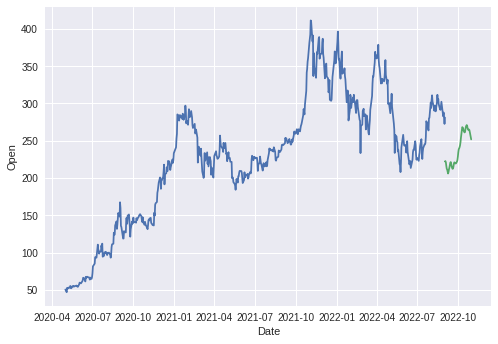

In [ ]:
original = Tesla[['Date', 'Open']]
original['Date'] = pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(Tesla_forecast['Date'], Tesla_forecast['Open'])

Summary of the Experiments - The green line in the above plot shows the prediction for 60 days in future greater than 2020-5-1. Henceforth, the RNN model solves the problem of stock price prediction considerably well, taking into account multiple factors (multivariate analysis). Overall, we can conclude that we can accurately predict the stock price 60 days ahead using this developed RNN-LSTM model.
